## Read in Data and Preview

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
panel_data = pd.read_excel('../data/DSA3101_Hackathon_Panelists_Demographics.xlsx') 
cat_data = pd.read_csv('../data/DSA3101_Hackathon_Categories_Information.csv')
data = pd.read_csv('../data/DSA3101_Hackathon_Data.csv')

In [4]:
panel_data.head()

,ID,BMI,Income,Ethnicity,Lifestage,Strata,#HH,location
0,Panel 101011101,Obese,Income 1500 - 1999,North Malay,Empty Nesters,Urban,1-3 Member HH,North
1,Panel 101016101,Healthy,Income 1500 - 1999,North Malay,Teens Aches,Urban,1-3 Member HH,North
2,Panel 101019101,Obese,Income < 1500,North Malay,Teens Aches,Urban,4 Member HH,North
3,Panel 101024101,Over Weight,Income 1500 - 1999,North Chinese,Nesting Families,Urban,1-3 Member HH,North
4,Panel 105009103,Over Weight,Income < 1500,North Malay,Empty Nesters,Rural,1-3 Member HH,North


In [5]:
data.isnull().sum()
#cat_data.isnull().sum()
#panel_data.isnull().sum()

Panel ID     0
Date         0
Category     0
Pack Size    0
Volume       0
Spend        0
dtype: int64

In [6]:
data.head()

,Panel ID,Date,Category,Pack Size,Volume,Spend
0,Panel 101011101,2017-07-02,CSD,1,1.5,1.5
1,Panel 101011101,2017-07-02,Soy Milk,1,1.0,2.8
2,Panel 101011101,2017-07-02,Cooking Sauces,1,0.3,3.2
3,Panel 101011101,2017-07-02,Coconut Milk,2,0.4,5.3
4,Panel 101011101,2017-07-02,Chocolate,1,0.2,6.6


In [7]:
panelist = list(data['Panel ID'].unique())
len(panelist)

3236

## Hirachical Clustering of products into several baskets

In [8]:
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import normalize
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler

In [9]:
cat_data = cat_data.set_index(cat_data['Category'])

In [10]:
cat_data.head()

,Category,Calories/100g,Price per Volume
Category,,,
Baby Cereal,Baby Cereal,188,29.41
Beer,Beer,43,15.12
Belacan,Belacan,563,39.47
Bird Nest,Bird Nest,46,73.45
Biscuits,Biscuits,416,15.57


In [11]:
seg_data = cat_data.drop(['Category'], axis=1)

In [12]:
scaler = MinMaxScaler()    #to scale the variables
seg_data[['Calories/100g', 'Price per Volume']] = scaler.fit_transform(seg_data[['Calories/100g', 'Price per Volume']])

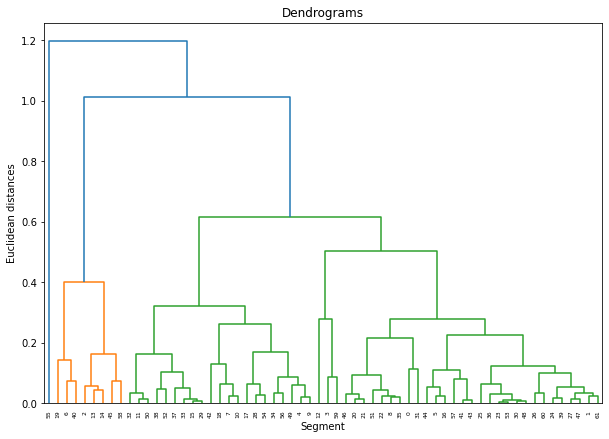

In [13]:
plt.figure(figsize=(10, 7)) 
dendrogram = sch.dendrogram(sch.linkage(seg_data,method='complete'))
plt.title("Dendrograms")  
plt.xlabel('Segment')
plt.ylabel('Euclidean distances')
plt.axhline(y=100000, color='r', linestyle='--')
plt.show()

In [14]:
hc1 = AgglomerativeClustering(n_clusters = 8, affinity = 'euclidean', linkage ='complete')

In [15]:
hc1_Y = hc1.fit_predict(seg_data)

In [16]:
clusters = hc1.labels_ #Add the cluster labels back to original dataframe
seg_data['Clusters'] = clusters

In [17]:
seg_data.head()

,Calories/100g,Price per Volume,Clusters
Category,,,
Baby Cereal,0.23500,0.144823,3
Beer,0.05375,0.073559,1
Belacan,0.70375,0.194993,4
Bird Nest,0.05750,0.364452,0
Biscuits,0.52000,0.075803,2


In [18]:
seg_data.groupby('Clusters').mean()

,Calories/100g,Price per Volume
Clusters,,
0,0.165000,0.393992
1,0.054625,0.064061
2,0.497813,0.083886
3,0.194861,0.087966
4,0.689000,0.164173
5,0.932083,0.062188
6,0.336111,0.111643
7,0.312500,1.000000


In [19]:
seg_data[seg_data["Clusters"] == 7]  
#Spirits looks like an outlier in the plot. 
#In future analysis,first drop this category to cluster the rest again.
#Spirits will be taken as a seperate basket

,Calories/100g,Price per Volume,Clusters
Category,,,
Spirits,0.3125,1.0,7


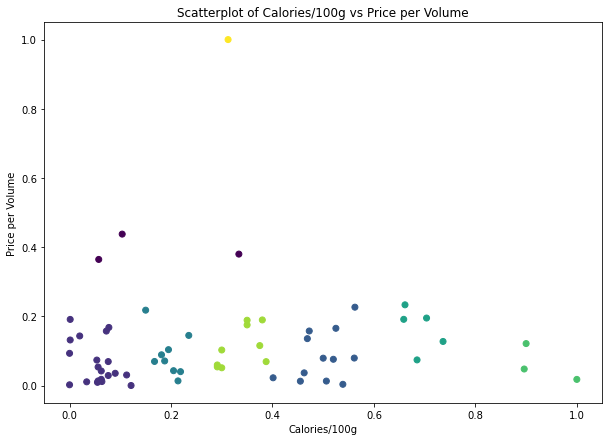

In [20]:
plt.figure(figsize=(10, 7)) 
plt.scatter(x=seg_data['Calories/100g'], y=seg_data['Price per Volume'], c=hc1.labels_)
plt.xlabel('Calories/100g')
plt.ylabel('Price per Volume')
plt.title('Scatterplot of Calories/100g vs Price per Volume')
plt.show()

In [21]:
seg_data2 = cat_data.drop(['Category'], axis=1)
seg_data2.head()

,Calories/100g,Price per Volume
Category,,
Baby Cereal,188,29.41
Beer,43,15.12
Belacan,563,39.47
Bird Nest,46,73.45
Biscuits,416,15.57


In [22]:
# Drop Spirits data to do cluster again
seg_data2=seg_data2[seg_data2.index!='Spirits']

In [23]:
scaler = MinMaxScaler()
seg_data2[['Calories/100g', 'Price per Volume']] = scaler.fit_transform(seg_data2[['Calories/100g', 'Price per Volume']])

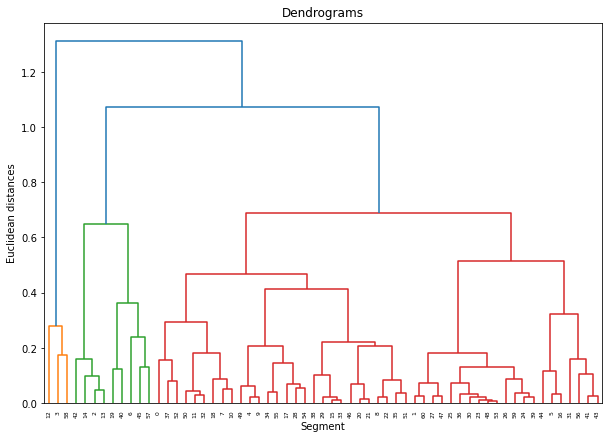

In [24]:
plt.figure(figsize=(10, 7)) 
dendrogram = sch.dendrogram(sch.linkage(seg_data2,method='complete'))
plt.title("Dendrograms")  
plt.xlabel('Segment')
plt.ylabel('Euclidean distances')
plt.axhline(y=100000, color='r', linestyle='--')
plt.show()

In [25]:
hc12 = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage ='complete')

In [26]:
hc1_Y = hc12.fit_predict(seg_data2)

In [27]:
clusters2 = hc12.labels_ #Add the cluster labels back to original dataframe
seg_data2['Clusters'] = clusters2

In [28]:
seg_data2.groupby('Clusters').mean()

,Calories/100g,Price per Volume
Clusters,,
0,0.358571,0.192493
1,0.046071,0.359666
2,0.843500,0.177256
3,0.165000,0.900220
4,0.646563,0.483221
5,0.065714,0.064811


In [30]:
seg_data2.to_csv("../data/food_basket.csv")

In [33]:
# When rerun use this csv to make result consistent
#seg_data2 = pd.read_csv("../data/food_basket.csv")

In [35]:
seg_data2[seg_data2['Clusters']==1]

,Category,Calories/100g,Price per Volume,Clusters
5,Bouilon,0.02000,0.327256,1
16,Coffee,0.00125,0.300706,1
31,Ghee,0.15000,0.497607,1
41,Milk Powder-Adult,0.07250,0.359503,1
43,Milk Powder-Kids,0.07750,0.383546,1
44,MSG,0.00000,0.212511,1
56,Tea,0.00125,0.436531,1


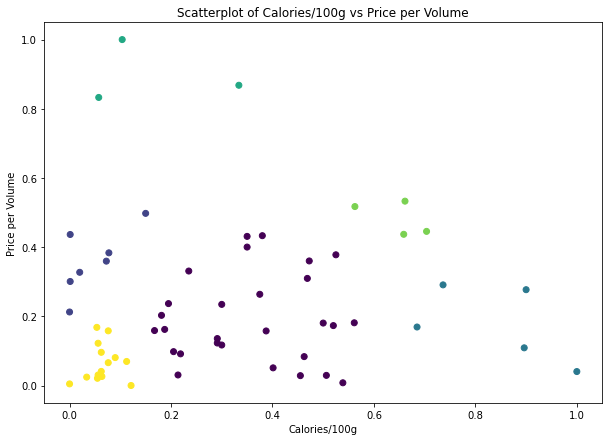

In [36]:
plt.figure(figsize=(10, 7)) 
plt.scatter(x=seg_data2['Calories/100g'], y=seg_data2['Price per Volume'], c=hc12.labels_)
plt.xlabel('Calories/100g')
plt.ylabel('Price per Volume')
plt.title('Scatterplot of Calories/100g vs Price per Volume')
plt.show()